In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_path = os.path.join("..","..","data","clean_data","precios_sniim.parquet")

In [3]:
df_precios_sniim = pd.read_parquet(data_path)

In [4]:
df_precios_sniim.sample(10)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
420723,2022-11-08,Col Mediana,Pieza,Puebla,Chiapas,Central de Abasto de Tuxtla Gutiérrez,20.00,25.00,20.00
188438,2020-12-14,Apio,Caja de 24 pzas.,Jalisco,Baja California Sur,Unión de Comerciantes de La Paz,12.50,24.17,17.50
1664374,2023-03-03,Berenjena,Kilogramo,Veracruz,Veracruz,Central de Abasto de Jalapa,42.00,43.00,42.00
923187,2023-09-15,Papaya Maradol,Kilogramo,Colima,Querétaro,Mercado de Abasto de Querétaro,17.00,19.00,18.00
1943836,2021-09-03,Manzana Red Delicious,Caja de 18 kg.,Importación,Nuevo León,"Mercado de Abasto ""Estrella"" de San Nicolás de...",41.67,44.44,41.67
288969,2021-08-26,Chile Jalapeño,Kilogramo,Michoacán,Puebla,Central de Abasto de Puebla,16.00,18.00,16.00
927313,2022-11-30,Lima,Kilogramo,Jalisco,Jalisco,Mercado de Abasto de Guadalajara,21.00,23.00,21.00
346339,2023-02-02,Toronja Roja Mediana,Kilogramo,Puebla,Guerrero,Central de Abastos de Acapulco,20.00,20.00,20.00
895592,2021-09-01,Cilantro,Manojo,Puebla,Sonora,Central de Abasto de Cd. Obregón,5.00,5.00,5.00
1766122,2021-01-11,Nopal,Caja de 20 kg.,México,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,7.50,8.50,8.00


In [5]:
df_precios_sniim["año"] = df_precios_sniim["fecha"].dt.year
df_precios_sniim["mes"] = df_precios_sniim["fecha"].dt.month

In [13]:
def graficar_precios(df,cultivo):
    subset_df = df[df["producto"] == cultivo]
    
    fig,ax = plt.subplots()
    
    sns.lineplot(x="fecha",
             y="precio_frec",
             hue="año",
             data=subset_df,
             errorbar=None,
             ax=ax)
    
    ax.title.set_text(f"Historial de precios para {cultivo}")
    ax.grid(axis='y')
    ax.tick_params(axis='x',rotation=90);

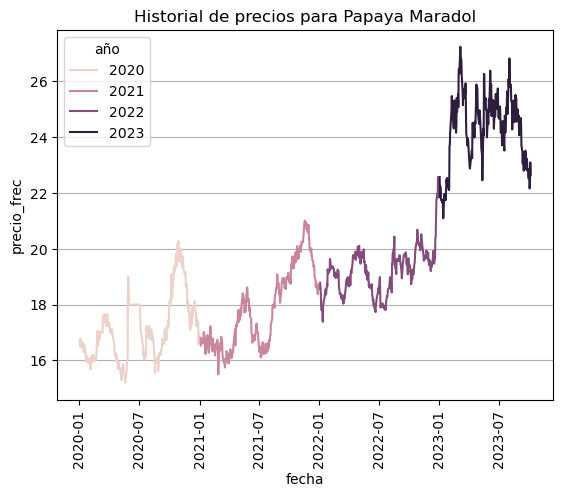

In [15]:
graficar_precios(df_precios_sniim,"Papaya Maradol")

In [6]:
jalapeno_df = df_precios_sniim[df_precios_sniim["producto"] == "Chile Jalapeño"] 

In [7]:
jalapeno_df.sample(10)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec,año,mes
373672,2022-07-12,Chile Jalapeño,Kilogramo,Querétaro,Querétaro,Mercado de Abasto de Querétaro,18.00,19.00,18.00,2022,7
412536,2023-09-21,Chile Jalapeño,Kilogramo,Distrito Federal,Yucatán,Centro Mayorista Oxkutzcab,50.00,50.00,50.00,2023,9
285244,2021-03-19,Chile Jalapeño,Kilogramo,Sonora,Chihuahua,Mercado de Abasto de Cd. Juárez,9.00,9.00,9.00,2021,3
283279,2021-09-23,Chile Jalapeño,Kilogramo,Zacatecas,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,20.00,22.00,21.00,2021,9
367765,2022-11-23,Chile Jalapeño,Arpilla de 24 kg.,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",11.46,11.46,11.46,2022,11
412175,2023-01-10,Chile Jalapeño,Kilogramo,Distrito Federal,Yucatán,Central de Abasto de Mérida,50.00,50.00,50.00,2023,1
291387,2021-03-01,Chile Jalapeño,Kilogramo,Veracruz,Veracruz,Central de Abasto de Minatitlán,10.00,14.00,12.00,2021,3
375507,2022-10-27,Chile Jalapeño,Arpilla de 25 kg.,Nuevo León,Tamaulipas,Módulo de Abasto de Reynosa,22.00,26.00,24.00,2022,10
371857,2022-10-19,Chile Jalapeño,Arpilla de 30 kg.,Michoacán,México,Central de Abasto de Toluca,14.00,16.00,15.00,2022,10
287742,2021-12-07,Chile Jalapeño,Kilogramo,Jalisco,Michoacán,Mercado de Abasto de Morelia,20.00,24.00,23.00,2021,12


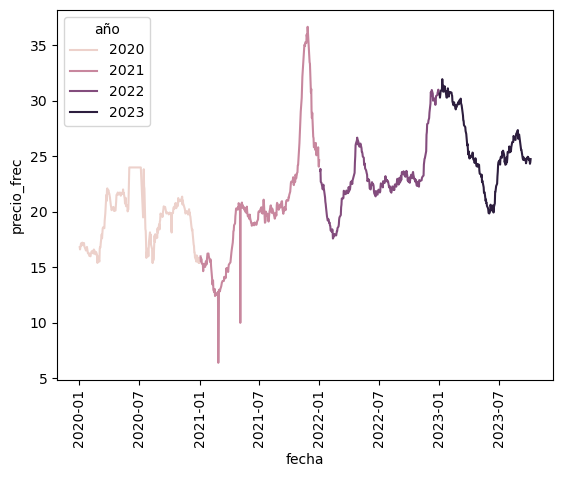

In [8]:
sns.lineplot(x="fecha",
             y="precio_frec",
             hue="año",
             data=jalapeno_df,
             errorbar=None)

plt.xticks(rotation=90);